In [29]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *
import      configparser
inputs = configparser.ConfigParser()

#path dove stanno i dati del fit
spectra_filename    =   'NO_ARS_13_02'
spectra_path =   '../BRILLOUIN/TDP43/' + spectra_filename + '/'
analysis_dir     =   'analysis_delta_lm_right'
now_path         =   spectra_path+analysis_dir+'/'
save_path = '../Scrittek/figures/'
with open(now_path+'config.ini', 'r') as f:
    inputs.read_file(f)
### recupero info su dimensionalità
n_rows    =     inputs.getint('I/O', 'n_rows')
n_cols    =     inputs.getint('I/O', 'n_cols')
###
matrix, rows, cols = Initialize_Matrix(0,0,n_rows,n_cols)

Ho inizializzato una matrice 88x76, per un totale di 6688 spettri


In [30]:

#1) Recupero info su posizioni + info su chi è bono e chi no e su VIPA (questo solo per matrix[0][0])

excluded = ()

with open(now_path+'markov_fit.txt', 'r') as fin:
    fit     =   eval(fin.read())
_,_,_, boni = Unpack_Fit(fit)

with open(now_path+'xy_VIPA.txt', 'r') as fin:
    VIPAs = fin.readlines()[1:]

x_VIPA = np.array(VIPAs[0][1:-2].split(), dtype=float)
y_VIPA = np.array(VIPAs[1][1:-2].split(), dtype=float)

x = np.load(now_path+'x.npy', allow_pickle = True)
y = np.load(now_path+'y.npy', allow_pickle = True)

count = 0
for ii in range(n_rows):
    for jj in range (n_cols):
        matrix[ii][jj].Recover_VIPA(x_VIPA, y_VIPA)
        matrix[ii][jj].Recover_Spectrum(x[count],y[count])    
        count+=1
        if (ii,jj) not in boni:
            excluded = excluded +((ii,jj),)
        
if count != (n_rows*n_cols): raise ValueError('Incompatibile')
print('Ok ho recuperato le informazioni sulle posizioni')

Ok ho recuperato le informazioni sulle posizioni


In [31]:
#2) Acquisico i dati prodotti dal fit markoviano


##################### MARKOVIANO

with open(now_path+'y_markov_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_markov.txt', 'r') as fin:
    costi = fin.readlines()

with open(now_path+'markov_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza boni ({}) e informazioni parametri fit ({})".format(len(boni), len(lines)))
if (len(boni) != len(costi)):
    raise ValueError("Incompatibilità tra lunghezza boni ({}) e informazioni costo fit ({})".format(len(boni), len(costi)))
if (len(boni) != len(y_fits)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e y fit ({})".format(len(boni), len(y_fits)))


for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,   boni) :
    matrix[ii][jj].Recover_Markov_Fit_Params(line)
    matrix[ii][jj].Recover_y_markov_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_markov(float(cost))

print('Ok ho recuperato le informazioni del Fit Markoviano')




Ok ho recuperato le informazioni del Fit Markoviano


Completata Parameter_Map per Omega
Ho trovato 38 elementi saturati


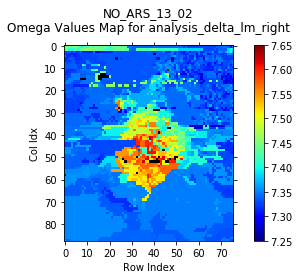

Completata Parameter_Map per Omega
Ho trovato 38 elementi saturati


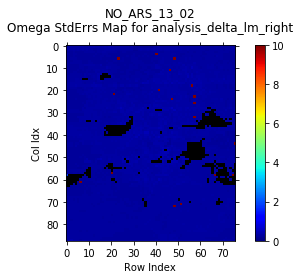

Completata Parameter_Map per Gamma
Ho trovato 38 elementi saturati


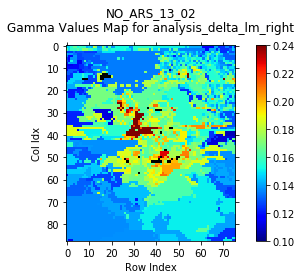

Completata Parameter_Map per Gamma
Ho trovato 38 elementi saturati


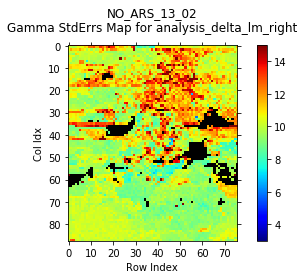

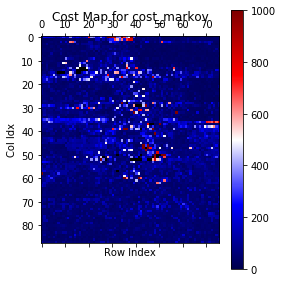

In [35]:
#MAPPE
omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.25, 7.65, analysis_dir, spectra_filename, fig = 'omega_markov_map', path=now_path)
Delta_omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,10, analysis_dir, spectra_filename ,fig = 'Delta_omega_markov_map', path=now_path, Deltas = True)
gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.1,0.24,analysis_dir, spectra_filename ,fig = 'Gamma_markov_map', path=now_path)
Delta_gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 3, 15, analysis_dir, spectra_filename, fig = 'Delta_Gamma_markov_map', path=now_path, Deltas = True)
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)

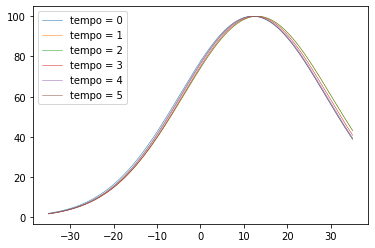

In [5]:

x = np.linspace(-35, 35, 500)
f, ax = plt.subplots()
sample = np.linspace(0, len(boni)-1, 6 , dtype = int)
tempo = 0
for ii,jj in np.array(boni)[sample]:
    ax.plot(x, gaussian(x, 100, *matrix[ii][jj].Markov_Fit_Params[['mu', 'sigma']].values[0]), label = 'tempo = {}'.format(tempo), linewidth = 0.51)
    ax.legend()
    tempo +=1 

#plt.savefig(save_path+'Gaussian flowing.pdf', format = 'pdf')

(2, 27)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009154  7.429816  0.149401        0.368817     0.185516   
StdErrs   0.001583  0.021832  0.015142        1.996899     1.852193   
Initials  0.009154  7.429816  0.149401        0.368817     0.185516   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.007391 -2.719411e+29  13.869410  11.527169  0.051954   
StdErrs          0.028910  5.083728e+38   0.523164   1.530675  0.021373   
Initials         0.007391 -2.719411e+29  13.869410  11.527169  0.051954   

            offset  
Values    3.598476  
StdErrs   3.065081  
Initials  3.598476  


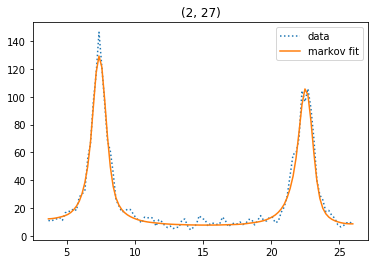

(2, 26)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009268  7.459431  0.157314        0.066712     0.215341   
StdErrs   0.001387  0.021940  0.015773        1.449000     1.547165   
Initials  0.010105  7.439274  0.153038        0.685231     0.133709   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.012966 -2.719411e+29  14.000758  11.039284  0.034931   
StdErrs          0.038621  4.069471e+38   0.544964   1.118746  0.021591   
Initials         0.029054 -2.692486e+27  13.993092  11.684558  0.042022   

            offset  
Values    3.961593  
StdErrs   4.530137  
Initials  5.253389  


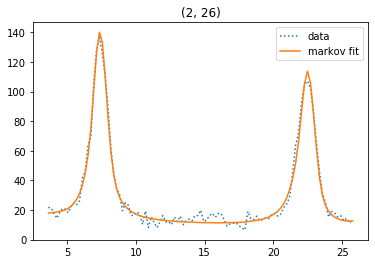

(2, 25)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010105  7.439274  0.153038        0.685231     0.133709   
StdErrs   0.001383  0.022054  0.016916        0.741408     0.444988   
Initials  0.010105  7.439274  0.153038        0.685231     0.133709   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.029054 -2.692486e+27  13.993092  11.684558  0.042022   
StdErrs          0.032114  4.071442e+36   0.525006   1.230738  0.022064   
Initials         0.029054 -2.692486e+27  13.993092  11.684558  0.042022   

            offset  
Values    5.253389  
StdErrs   3.361585  
Initials  5.253389  


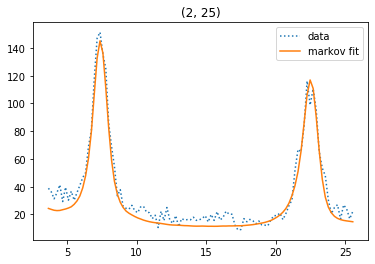

(2, 24)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010105  7.439274  0.153038        0.685231     0.133709   
StdErrs   0.001368  0.021871  0.016858        0.652261     0.430040   
Initials  0.010105  7.439274  0.153038        0.685231     0.133709   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.029054 -2.692486e+27  13.993092  11.684558  0.042022   
StdErrs          0.031233  4.043085e+36   0.524045   1.213785  0.021958   
Initials         0.029054 -2.692486e+27  13.993092  11.684558  0.042022   

            offset  
Values    5.253389  
StdErrs   3.264092  
Initials  5.253389  


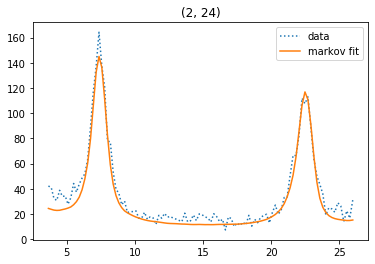

(2, 23)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010105  7.439274  0.153038        0.685231     0.133709   
StdErrs   0.001360  0.021746  0.016526        0.713902     0.418500   
Initials  0.010105  7.439274  0.153038        0.685231     0.133709   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.029054 -2.692486e+27  13.993092  11.684558  0.042022   
StdErrs          0.030304  4.130269e+36   0.522972   1.207820  0.021760   
Initials         0.029054 -2.692486e+27  13.993092  11.684558  0.042022   

            offset  
Values    5.253389  
StdErrs   3.246068  
Initials  5.253389  


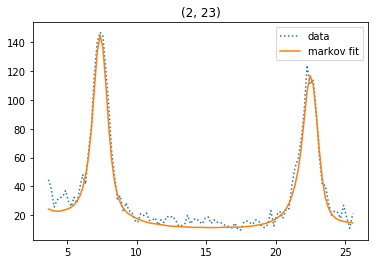

(2, 22)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010629  7.431671  0.154581        0.829689     0.146423   
StdErrs   0.001092  0.022497  0.017333        0.341978     0.205227   
Initials  0.009964  7.428508  0.139043        0.772341     0.091868   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.077850 -2.692486e+27  13.886860  12.014212  0.058052   
StdErrs          0.036940  3.383998e+36   0.584529   0.958275  0.022681   
Initials         0.077892 -2.665828e+25  14.220162  11.467400  0.061967   

            offset  
Values    5.421744  
StdErrs   3.837781  
Initials  4.337719  


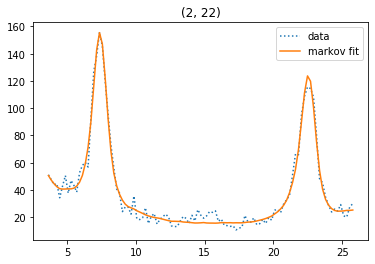

(2, 21)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010629  7.431671  0.154581        0.829689     0.146423   
StdErrs   0.001213  0.023644  0.018695        0.395855     0.238038   
Initials  0.010629  7.431671  0.154581        0.829689     0.146423   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.077850 -2.692486e+27  13.886860  12.014212  0.058052   
StdErrs          0.042445  3.612213e+36   0.614889   1.079288  0.023813   
Initials         0.077850 -2.692486e+27  13.886860  12.014212  0.058052   

            offset  
Values    5.421744  
StdErrs   4.313692  
Initials  5.421744  


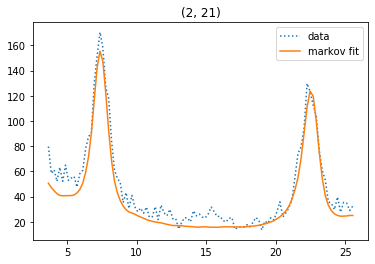

(2, 20)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010629  7.431671  0.154581        0.829689     0.146423   
StdErrs   0.001234  0.023802  0.018791        0.402747     0.242828   
Initials  0.010629  7.431671  0.154581        0.829689     0.146423   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.077850 -2.692486e+27  13.886860  12.014212  0.058052   
StdErrs          0.043323  3.593230e+36   0.619821   1.094670  0.023840   
Initials         0.077850 -2.692486e+27  13.886860  12.014212  0.058052   

            offset  
Values    5.421744  
StdErrs   4.395861  
Initials  5.421744  


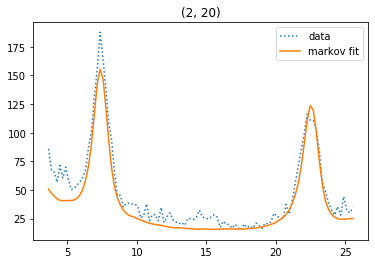

(2, 19)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010479  7.412832  0.150395        0.540453     0.088895   
StdErrs   0.000615  0.024810  0.018645        0.032315     0.025673   
Initials  0.009748  7.414185  0.137300        0.339782     0.278730   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.203645  1.395372e+16  14.653851  11.652877  0.027395   
StdErrs          0.018760  1.436284e+25   0.622562   0.389893  0.023675   
Initials         0.145511  9.240872e+13  13.769575  11.257772  0.071110   

            offset  
Values    1.464337  
StdErrs   3.093121  
Initials -9.365063  


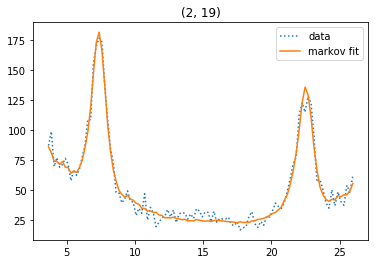

(2, 18)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009971  7.433315  0.164651        0.501021     0.086302   
StdErrs   0.000567  0.024067  0.018270        0.035934     0.036312   
Initials  0.010479  7.412832  0.150395        0.540453     0.088895   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.137786  1.409325e+18  14.277012  11.258822  0.053133   
StdErrs          0.017215  1.871921e+27   0.562184   0.327360  0.024643   
Initials         0.203645  1.395372e+16  14.653851  11.652877  0.027395   

            offset  
Values    1.371800  
StdErrs   2.737375  
Initials  1.464337  


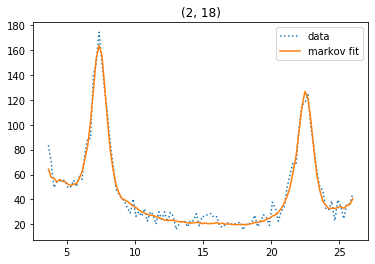

(2, 17)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009814  7.442484  0.160844        0.500333     0.137965   
StdErrs   0.000650  0.024829  0.019118        0.150004     0.114588   
Initials  0.010479  7.412832  0.150395        0.540453     0.088895   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.167817  1.409325e+18  14.277320  11.139147  0.026501   
StdErrs          0.047801  1.438909e+27   0.673816   0.346356  0.025360   
Initials         0.203645  1.395372e+16  14.653851  11.652877  0.027395   

            offset  
Values   -3.438395  
StdErrs   4.558303  
Initials  1.464337  


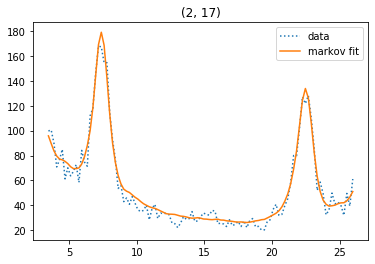

(2, 16)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010155  7.447765  0.160251        0.492446     0.065135   
StdErrs   0.000561  0.022854  0.016999        0.016742     0.014966   
Initials  0.009971  7.433315  0.164651        0.501021     0.086302   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.121130  2.494647e+22  13.796939  11.215246  0.059508   
StdErrs          0.011272  3.085504e+31   0.496371   0.354257  0.022532   
Initials         0.137786  1.409325e+18  14.277012  11.258822  0.053133   

            offset  
Values    0.721682  
StdErrs   2.379942  
Initials  1.371800  


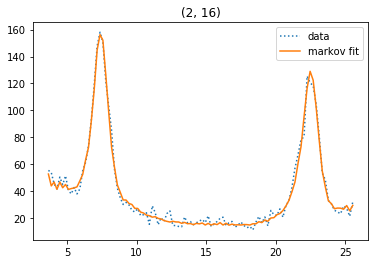

(2, 15)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010368  7.440876  0.144052        0.524919     0.245371   
StdErrs   0.000846  0.023024  0.018206        0.410375     0.382635   
Initials  0.010696  7.448286  0.141169        0.927336     0.123461   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.085874  2.613039e+25  14.950758  12.036544  0.045187   
StdErrs          0.057422  3.261044e+34   0.716758   0.710824  0.022895   
Initials         0.127758 -2.639434e+23  14.468820  12.222681  0.033366   

            offset  
Values    4.512483  
StdErrs   6.566330  
Initials  9.271765  


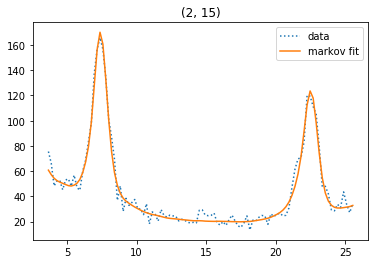

(2, 14)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010368  7.440876  0.144052        0.524919     0.245371   
StdErrs   0.000678  0.021331  0.015951        0.267483     0.292373   
Initials  0.010368  7.440876  0.144052        0.524919     0.245371   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.085874  2.613039e+25  14.950758  12.036544  0.045187   
StdErrs          0.044817  2.779562e+34   0.647771   0.567055  0.021116   
Initials         0.085874  2.613039e+25  14.950758  12.036544  0.045187   

            offset  
Values    4.512483  
StdErrs   4.810295  
Initials  4.512483  


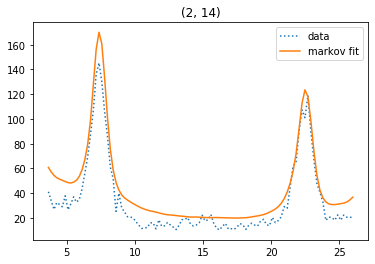

(2, 13)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010447  7.453669  0.152239        0.238532     0.492690   
StdErrs   0.004630  0.020362  0.014879        1.613596     4.423085   
Initials  0.010368  7.440876  0.144052        0.524919     0.245371   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.013748  2.639170e+27  14.019032  11.647929  0.052872   
StdErrs          0.069443  4.885640e+36   0.852392   4.186415  0.022017   
Initials         0.085874  2.613039e+25  14.950758  12.036544  0.045187   

            offset  
Values   -1.240751  
StdErrs   6.306663  
Initials  4.512483  


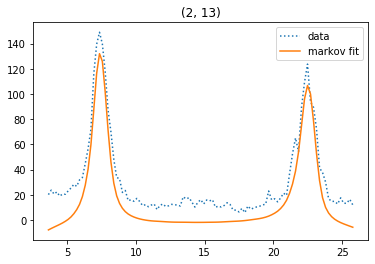

(2, 12)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010447  7.453669  0.152239        0.238532     0.492690   
StdErrs   0.004633  0.019641  0.014483        1.551183     4.339217   
Initials  0.010447  7.453669  0.152239        0.238532     0.492690   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.013748  2.639170e+27  14.019032  11.647929  0.052872   
StdErrs          0.068338  4.652336e+36   0.842789   4.192587  0.021346   
Initials        -0.013748  2.639170e+27  14.019032  11.647929  0.052872   

            offset  
Values   -1.240751  
StdErrs   6.147313  
Initials -1.240751  


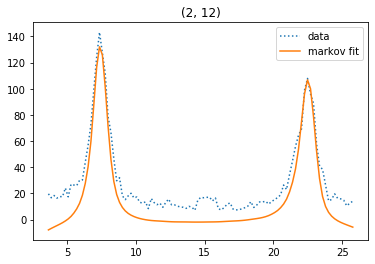

(2, 11)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010997  7.456733  0.162781        0.789701     0.176775   
StdErrs   0.000854  0.022440  0.016925        0.385288     0.271049   
Initials  0.010696  7.448286  0.141169        0.927336     0.123461   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.081075 -2.665828e+25  13.772898  11.510678  0.057066   
StdErrs          0.045981  3.242134e+34   0.576183   0.586165  0.022150   
Initials         0.127758 -2.639434e+23  14.468820  12.222681  0.033366   

            offset  
Values    3.594909  
StdErrs   4.814371  
Initials  9.271765  


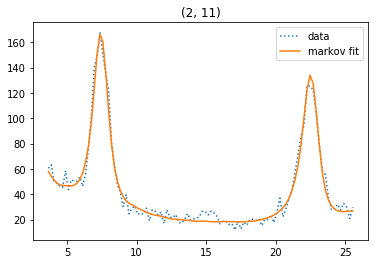

(2, 10)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010997  7.456733  0.162781        0.789701     0.176775   
StdErrs   0.000752  0.020748  0.015336        0.282438     0.222876   
Initials  0.010997  7.456733  0.162781        0.789701     0.176775   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.081075 -2.665828e+25  13.772898  11.510678  0.057066   
StdErrs          0.038805  2.854733e+34   0.535494   0.506198  0.020496   
Initials         0.081075 -2.665828e+25  13.772898  11.510678  0.057066   

            offset  
Values    3.594909  
StdErrs   3.980172  
Initials  3.594909  


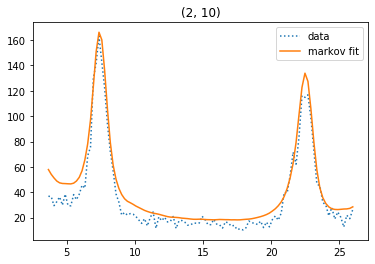

(2, 9)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.011941  7.445885  0.172464        0.931781     0.180676   
StdErrs   0.001300  0.024073  0.018194        0.332789     0.239846   
Initials  0.010696  7.448286  0.141169        0.927336     0.123461   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.100159 -2.665828e+25  14.603337  12.483855  0.044664   
StdErrs          0.049020  3.188460e+34   0.714969   1.158099  0.024068   
Initials         0.127758 -2.639434e+23  14.468820  12.222681  0.033366   

            offset  
Values    7.164826  
StdErrs   4.978688  
Initials  9.271765  


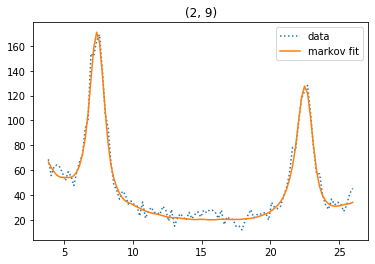

(2, 8)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.011941  7.445885  0.172464        0.931781     0.180676   
StdErrs   0.001140  0.022483  0.016688        0.293401     0.209200   
Initials  0.011941  7.445885  0.172464        0.931781     0.180676   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.100159 -2.665828e+25  14.603337  12.483855  0.044664   
StdErrs          0.042051  2.832096e+34   0.669753   1.001357  0.022542   
Initials         0.100159 -2.665828e+25  14.603337  12.483855  0.044664   

            offset  
Values    7.164826  
StdErrs   4.391554  
Initials  7.164826  


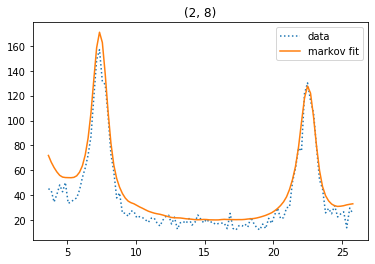

(2, 7)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.011941  7.445885  0.172464        0.931781     0.180676   
StdErrs   0.001277  0.024169  0.018408        0.340134     0.240384   
Initials  0.011941  7.445885  0.172464        0.931781     0.180676   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.100159 -2.665828e+25  14.603337  12.483855  0.044664   
StdErrs          0.048364  3.233378e+34   0.711988   1.127189  0.024105   
Initials         0.100159 -2.665828e+25  14.603337  12.483855  0.044664   

            offset  
Values    7.164826  
StdErrs   4.928707  
Initials  7.164826  


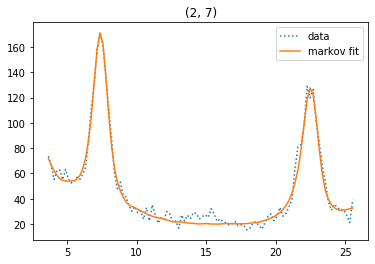

(2, 6)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.013002  7.411539  0.157844        1.014200     0.153198   
StdErrs   0.002618  0.023022  0.017523        0.228762     0.147352   
Initials  0.013002  7.411539  0.157844        1.014200     0.153198   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.131172  1.326349e+21  14.361813  13.536172  0.046379   
StdErrs          0.043961  1.591492e+30   0.721836   2.881323  0.022569   
Initials         0.131172  1.326349e+21  14.361813  13.536172  0.046379   

             offset  
Values    10.623459  
StdErrs    3.763647  
Initials  10.623459  


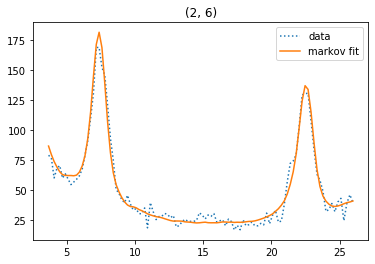

(2, 5)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.011002  7.438335  0.163544        0.351111     0.175958   
StdErrs   0.000730  0.024903  0.019363        0.204992     0.160002   
Initials  0.009814  7.442484  0.160844        0.500333     0.137965   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.170786  1.423419e+20  14.417513  11.464770  0.048673   
StdErrs          0.058995  1.320875e+29   0.622550   0.391279  0.024523   
Initials         0.167817  1.409325e+18  14.277320  11.139147  0.026501   

            offset  
Values   -3.201120  
StdErrs   6.218240  
Initials -3.438395  


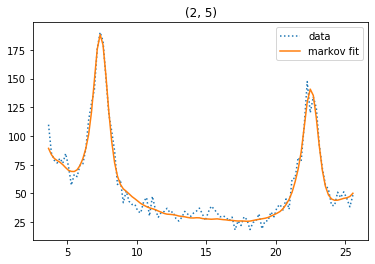

(2, 4)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.013002  7.411539  0.157844        1.014200     0.153198   
StdErrs   0.002617  0.022858  0.017423        0.228429     0.145414   
Initials  0.013002  7.411539  0.157844        1.014200     0.153198   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.131172  1.326349e+21  14.361813  13.536172  0.046379   
StdErrs          0.043294  1.560658e+30   0.723922   2.871144  0.022416   
Initials         0.131172  1.326349e+21  14.361813  13.536172  0.046379   

             offset  
Values    10.623459  
StdErrs    3.739468  
Initials  10.623459  


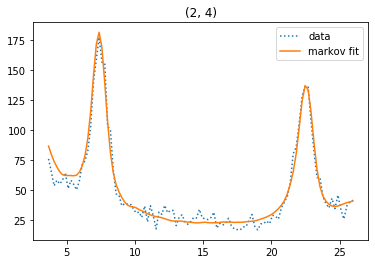

(2, 3)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.013002  7.411539  0.157844        1.014200     0.153198   
StdErrs   0.002784  0.023390  0.017709        0.253608     0.148903   
Initials  0.013002  7.411539  0.157844        1.014200     0.153198   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.131172  1.326349e+21  14.361813  13.536172  0.046379   
StdErrs          0.044255  1.650827e+30   0.735875   3.085552  0.022942   
Initials         0.131172  1.326349e+21  14.361813  13.536172  0.046379   

             offset  
Values    10.623459  
StdErrs    4.021275  
Initials  10.623459  


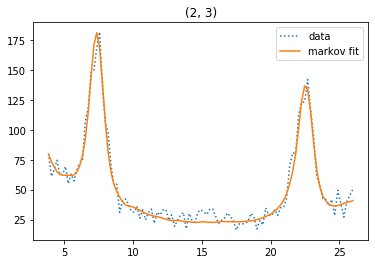

(2, 2)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.013002  7.411539  0.157844        1.014200     0.153198   
StdErrs   0.002628  0.022943  0.017546        0.236372     0.146630   
Initials  0.013002  7.411539  0.157844        1.014200     0.153198   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.131172  1.326349e+21  14.361813  13.536172  0.046379   
StdErrs          0.043778  1.603049e+30   0.730535   2.912438  0.022459   
Initials         0.131172  1.326349e+21  14.361813  13.536172  0.046379   

             offset  
Values    10.623459  
StdErrs    3.790065  
Initials  10.623459  


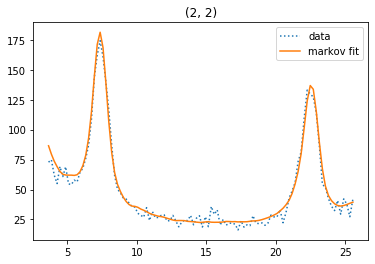

(2, 1)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.012467  7.445873  0.147183        0.867506     0.191225   
StdErrs   0.003377  0.023465  0.017355        0.333502     0.237385   
Initials  0.013002  7.411539  0.157844        1.014200     0.153198   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.102682  1.339612e+23  14.434155  13.756678  0.039973   
StdErrs          0.049483  2.081088e+32   0.743411   4.109924  0.022745   
Initials         0.131172  1.326349e+21  14.361813  13.536172  0.046379   

             offset  
Values    10.466195  
StdErrs    4.419319  
Initials  10.623459  


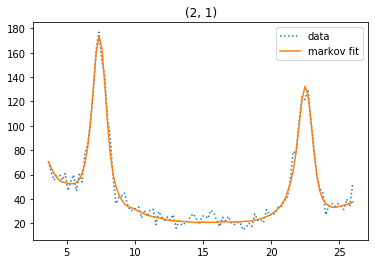

(2, 0)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010020  7.428107  0.163290        0.635145     0.058577   
StdErrs   0.000567  0.023334  0.017306        0.012428     0.011624   
Initials  0.011293  7.430773  0.149444        0.630598     0.078594   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.115691 -4.500931e+05  14.061306  11.215368  0.027890   
StdErrs          0.010711  5.744308e+14   0.567071   0.354218  0.022878   
Initials         0.079502 -4.500865e+05  14.810250  12.123894  0.071728   

            offset  
Values    2.860510  
StdErrs   2.369024  
Initials  4.980802  


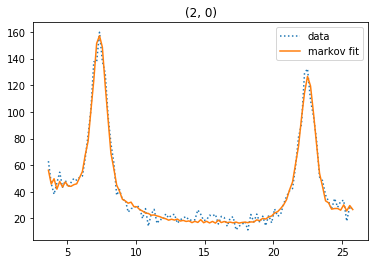

(3, 0)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.007893  7.331580  0.125330        0.618652     0.114384   
StdErrs   0.003472  0.018882  0.012829        0.627334     0.404121   
Initials  0.010020  7.428107  0.163290        0.635145     0.058577   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.011812  4.455922e+07  13.744628  10.231725  0.045413   
StdErrs          0.012716  8.723271e+16   0.676633   2.779540  0.019027   
Initials         0.115691 -4.500931e+05  14.061306  11.215368  0.027890   

            offset  
Values    3.997196  
StdErrs   2.483927  
Initials  2.860510  


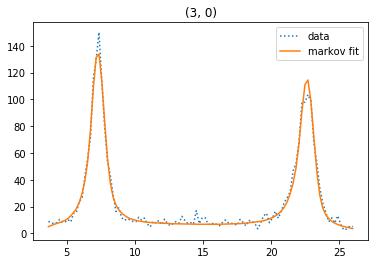

(3, 1)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.007893  7.331580  0.125330        0.618652     0.114384   
StdErrs   0.003191  0.019059  0.012666        0.592836     0.374697   
Initials  0.007893  7.331580  0.125330        0.618652     0.114384   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.011812  4.455922e+07  13.744628  10.231725  0.045413   
StdErrs          0.012535  8.621534e+16   0.618071   2.545734  0.019128   
Initials        -0.011812  4.455922e+07  13.744628  10.231725  0.045413   

            offset  
Values    3.997196  
StdErrs   2.221356  
Initials  3.997196  


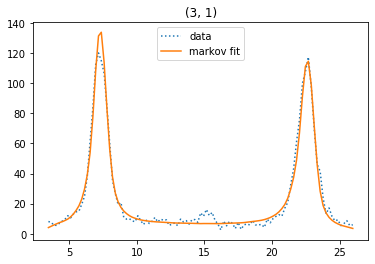

(3, 2)
                Co     Omega    Gamma  delta_position  delta_width  \
Values    0.007893  7.331580  0.12533        0.618652     0.114384   
StdErrs   0.003328  0.019328  0.01279        0.547233     0.390231   
Initials  0.007893  7.331580  0.12533        0.618652     0.114384   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.011812  4.455922e+07  13.744628  10.231725  0.045413   
StdErrs          0.012041  8.615170e+16   0.656989   2.662089  0.019501   
Initials        -0.011812  4.455922e+07  13.744628  10.231725  0.045413   

            offset  
Values    3.997196  
StdErrs   2.436439  
Initials  3.997196  


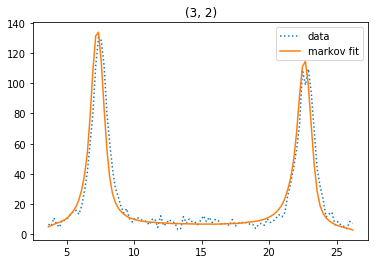

(3, 3)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.007641  7.308491  0.133838        0.597383     0.186527   
StdErrs   0.007192  0.020400  0.014168        1.526480     0.995681   
Initials  0.007893  7.331580  0.125330        0.618652     0.114384   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.008280  4.455922e+07  13.815984  10.004871  0.010072   
StdErrs          0.012008  7.091684e+16   1.247894   5.551326  0.019765   
Initials        -0.011812  4.455922e+07  13.744628  10.231725  0.045413   

            offset  
Values    3.629638  
StdErrs   7.408924  
Initials  3.997196  


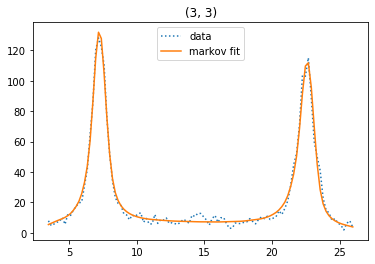

(3, 4)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009155  7.341081  0.126400        1.279529     0.085001   
StdErrs   0.001292  0.019239  0.012465        0.174970     0.158020   
Initials  0.007641  7.308491  0.133838        0.597383     0.186527   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.010659  4.455922e+07  13.670641  11.028491  0.033015   
StdErrs          0.006434  6.646076e+16   0.423356   1.101470  0.018290   
Initials        -0.008280  4.455922e+07  13.815984  10.004871  0.010072   

            offset  
Values    3.844340  
StdErrs   1.125473  
Initials  3.629638  


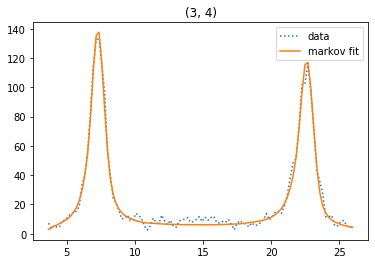

(3, 5)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.008329  7.319526  0.129213        1.200772     0.090630   
StdErrs   0.001210  0.019121  0.013313        0.273037     0.189563   
Initials  0.009155  7.341081  0.126400        1.279529     0.085001   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.009837  4.500481e+09  12.845377  10.695521  0.053558   
StdErrs          0.006639  5.522588e+18   0.455637   1.033341  0.019084   
Initials        -0.010659  4.455922e+07  13.670641  11.028491  0.033015   

            offset  
Values    4.126130  
StdErrs   1.094742  
Initials  3.844340  


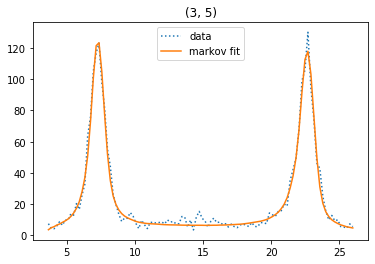

(3, 6)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.008329  7.319526  0.129213        1.200772     0.090630   
StdErrs   0.001097  0.019039  0.013062        0.251105     0.160494   
Initials  0.008329  7.319526  0.129213        1.200772     0.090630   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.009837  4.500481e+09  12.845377  10.695521  0.053558   
StdErrs          0.006064  5.514262e+18   0.429978   0.926221  0.019028   
Initials        -0.009837  4.500481e+09  12.845377  10.695521  0.053558   

            offset  
Values    4.126130  
StdErrs   1.025375  
Initials  4.126130  


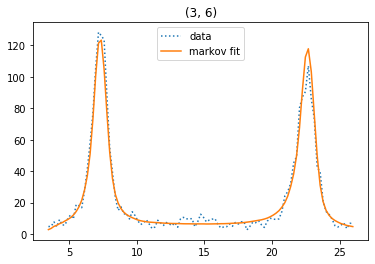

(3, 7)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.008987  7.336107  0.129761        1.220920    -0.018848   
StdErrs   0.000881  0.019641  0.013122        0.009589     0.012209   
Initials  0.008329  7.319526  0.129213        1.200772     0.090630   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.008250 -4.455476e+11  13.600713  11.191845  0.030433   
StdErrs          0.003912  7.011735e+20   0.532447   0.791052  0.019409   
Initials        -0.009837  4.500481e+09  12.845377  10.695521  0.053558   

            offset  
Values    4.528028  
StdErrs   1.237162  
Initials  4.126130  


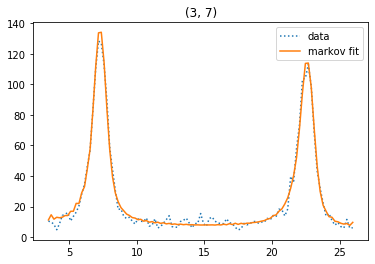

(3, 8)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010480  7.313431  0.126173        1.203017    -0.011383   
StdErrs   0.003998  0.021363  0.012913        0.008686     0.010510   
Initials  0.008987  7.336107  0.129761        1.220920    -0.018848   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.005478 -4.500031e+13  13.843616  12.681997  0.049290   
StdErrs          0.004347  7.279075e+22   0.708146   4.688836  0.019114   
Initials        -0.008250 -4.455476e+11  13.600713  11.191845  0.030433   

            offset  
Values    6.053491  
StdErrs   1.079557  
Initials  4.528028  


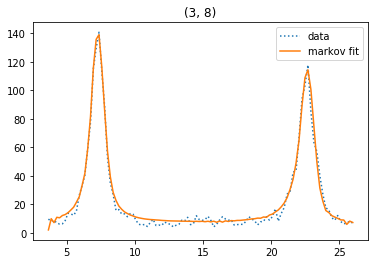

(3, 9)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010480  7.313431  0.126173        1.203017    -0.011383   
StdErrs   0.003957  0.021000  0.012842        0.008740     0.011270   
Initials  0.010480  7.313431  0.126173        1.203017    -0.011383   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.005478 -4.500031e+13  13.843616  12.681997  0.049290   
StdErrs          0.004626  7.237678e+22   0.701944   4.630430  0.018931   
Initials         0.005478 -4.500031e+13  13.843616  12.681997  0.049290   

            offset  
Values    6.053491  
StdErrs   1.040234  
Initials  6.053491  


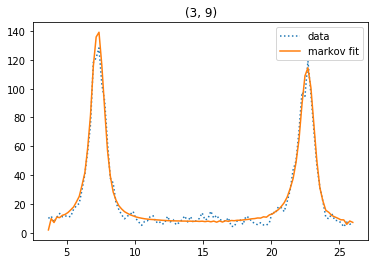

(3, 10)
               Co     Omega     Gamma  delta_position  delta_width  \
Values    0.01048  7.313431  0.126173        1.203017    -0.011383   
StdErrs   0.00456  0.022031  0.013605        0.010694     0.013646   
Initials  0.01048  7.313431  0.126173        1.203017    -0.011383   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.005478 -4.500031e+13  13.843616  12.681997  0.049290   
StdErrs          0.005584  7.728995e+22   0.774043   5.369787  0.019486   
Initials         0.005478 -4.500031e+13  13.843616  12.681997  0.049290   

            offset  
Values    6.053491  
StdErrs   1.192610  
Initials  6.053491  


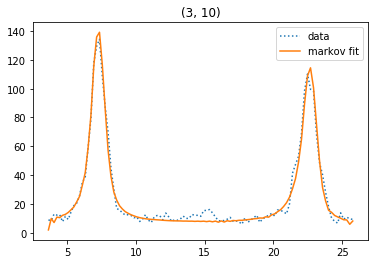

(3, 11)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010480  7.313431  0.126173        1.203017    -0.011383   
StdErrs   0.003807  0.021076  0.012543        0.007785     0.009630   
Initials  0.010480  7.313431  0.126173        1.203017    -0.011383   

          delta_amplitude             A         mu      sigma    shift  \
Values           0.005478 -4.500031e+13  13.843616  12.681997  0.04929   
StdErrs          0.003985  7.251915e+22   0.684158   4.435555  0.01874   
Initials         0.005478 -4.500031e+13  13.843616  12.681997  0.04929   

            offset  
Values    6.053491  
StdErrs   1.004569  
Initials  6.053491  


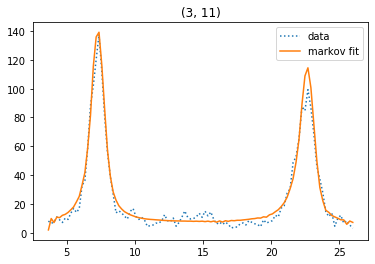

(3, 12)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010480  7.313431  0.126173        1.203017    -0.011383   
StdErrs   0.004382  0.021718  0.013330        0.009776     0.012987   
Initials  0.010480  7.313431  0.126173        1.203017    -0.011383   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.005478 -4.500031e+13  13.843616  12.681997  0.049290   
StdErrs          0.005264  7.553400e+22   0.757863   5.158575  0.019227   
Initials         0.005478 -4.500031e+13  13.843616  12.681997  0.049290   

            offset  
Values    6.053491  
StdErrs   1.118596  
Initials  6.053491  


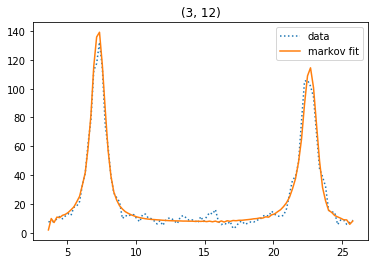

(3, 13)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.010429  7.343828  0.124997        1.203578    -0.020838   
StdErrs   0.006573  0.019692  0.012981        0.014117     0.016441   
Initials  0.010480  7.313431  0.126173        1.203017    -0.011383   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.006487 -4.545031e+15  13.227992  13.153325  0.060220   
StdErrs          0.004355  7.793214e+24   1.882515   8.641174  0.019373   
Initials         0.005478 -4.500031e+13  13.843616  12.681997  0.049290   

            offset  
Values    4.386675  
StdErrs   0.839292  
Initials  6.053491  


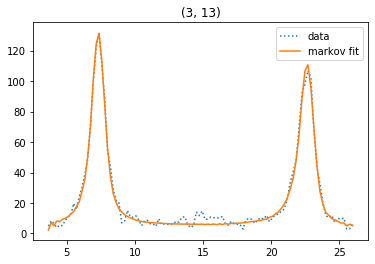

(3, 14)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.008990  7.300353  0.137817        1.205480    -0.019267   
StdErrs   0.001936  0.021083  0.016018        0.020709     0.022679   
Initials  0.010429  7.343828  0.124997        1.203578    -0.020838   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.005348  3.896078e+18  12.986247  11.798274  0.066526   
StdErrs          0.005673  5.725022e+27   0.660699   2.151197  0.020956   
Initials         0.006487 -4.545031e+15  13.227992  13.153325  0.060220   

            offset  
Values    5.681233  
StdErrs   1.206213  
Initials  4.386675  


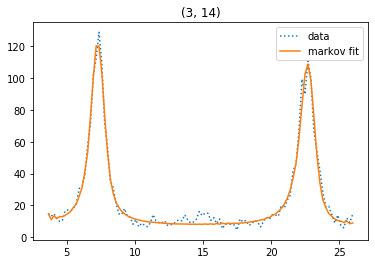

(3, 15)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.008990  7.300353  0.137817        1.205480    -0.019267   
StdErrs   0.001504  0.020553  0.015041        0.015198     0.016722   
Initials  0.008990  7.300353  0.137817        1.205480    -0.019267   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.005348  3.896078e+18  12.986247  11.798274  0.066526   
StdErrs          0.004223  5.534311e+27   0.586246   1.652295  0.020460   
Initials        -0.005348  3.896078e+18  12.986247  11.798274  0.066526   

            offset  
Values    5.681233  
StdErrs   0.935108  
Initials  5.681233  


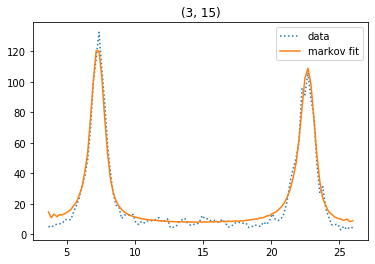

(3, 16)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009583  7.311014  0.149344        1.186214    -0.027540   
StdErrs   0.001889  0.024152  0.014729        0.450991     0.506100   
Initials  0.008990  7.300353  0.137817        1.205480    -0.019267   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.000328  3.935039e+20  14.271696  12.043348  0.066337   
StdErrs          0.004493  6.269418e+29   0.566862   2.070284  0.022258   
Initials        -0.005348  3.896078e+18  12.986247  11.798274  0.066526   

            offset  
Values    6.184335  
StdErrs   1.383964  
Initials  5.681233  


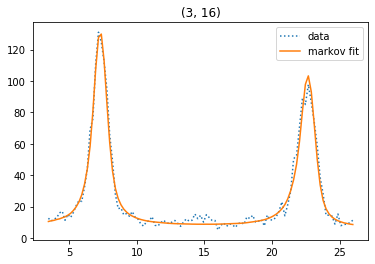

(3, 17)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009583  7.311014  0.149344        1.186214    -0.027540   
StdErrs   0.001575  0.022879  0.014120        0.396046     0.475626   
Initials  0.009583  7.311014  0.149344        1.186214    -0.027540   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.000328  3.935039e+20  14.271696  12.043348  0.066337   
StdErrs          0.004254  5.879560e+29   0.554767   1.720436  0.021099   
Initials        -0.000328  3.935039e+20  14.271696  12.043348  0.066337   

            offset  
Values    6.184335  
StdErrs   1.157648  
Initials  6.184335  


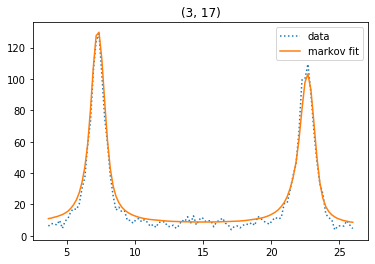

(3, 18)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009583  7.311014  0.149344        1.186214    -0.027540   
StdErrs   0.001648  0.022198  0.013819        0.418532     0.467223   
Initials  0.009583  7.311014  0.149344        1.186214    -0.027540   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.000328  3.935039e+20  14.271696  12.043348  0.066337   
StdErrs          0.004370  5.821124e+29   0.535488   1.802243  0.020446   
Initials        -0.000328  3.935039e+20  14.271696  12.043348  0.066337   

            offset  
Values    6.184335  
StdErrs   1.196601  
Initials  6.184335  


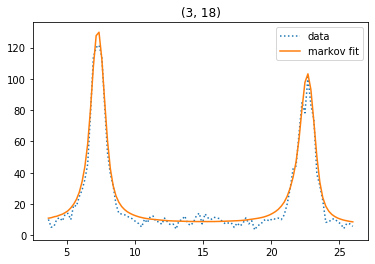

(3, 19)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009583  7.311014  0.149344        1.186214     -0.02754   
StdErrs   0.001716  0.022628  0.014064        0.392524      0.42774   
Initials  0.009583  7.311014  0.149344        1.186214     -0.02754   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.000328  3.935039e+20  14.271696  12.043348  0.066337   
StdErrs          0.004069  5.814323e+29   0.543398   1.891523  0.020840   
Initials        -0.000328  3.935039e+20  14.271696  12.043348  0.066337   

            offset  
Values    6.184335  
StdErrs   1.256434  
Initials  6.184335  


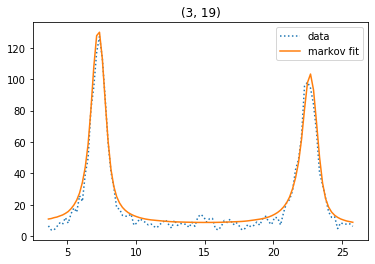

(3, 20)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009583  7.311014  0.149344        1.186214    -0.027540   
StdErrs   0.001680  0.022612  0.014068        0.410237     0.471431   
Initials  0.009583  7.311014  0.149344        1.186214    -0.027540   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.000328  3.935039e+20  14.271696  12.043348  0.066337   
StdErrs          0.004429  5.903379e+29   0.545107   1.843597  0.020996   
Initials        -0.000328  3.935039e+20  14.271696  12.043348  0.066337   

            offset  
Values    6.184335  
StdErrs   1.213560  
Initials  6.184335  


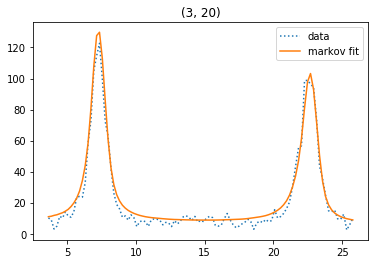

(3, 21)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.009583  7.311014  0.149344        1.186214    -0.027540   
StdErrs   0.001530  0.022809  0.013858        0.378565     0.460896   
Initials  0.009583  7.311014  0.149344        1.186214    -0.027540   

          delta_amplitude             A         mu      sigma     shift  \
Values          -0.000328  3.935039e+20  14.271696  12.043348  0.066337   
StdErrs          0.004138  5.858050e+29   0.553260   1.672051  0.021067   
Initials        -0.000328  3.935039e+20  14.271696  12.043348  0.066337   

            offset  
Values    6.184335  
StdErrs   1.136971  
Initials  6.184335  


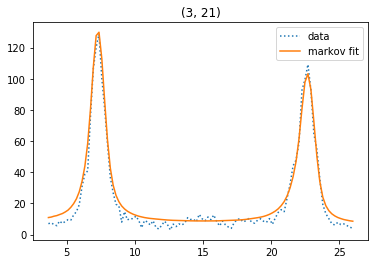

In [36]:
Plot_Elements_Spectrum(matrix, boni[200:250], fit = 'markov')

In [41]:
mu__too_high = Whose_Param_Too_High('mu', 300, 'markov', matrix,  boni)
len(mu__too_high)

357

Completata Parameter_Map per mu
Ho trovato 38 elementi saturati


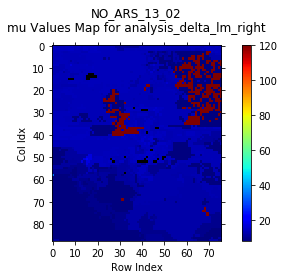

(array([[13.93909731, 11.39844619, 11.39844619, ..., 13.39911554,
         13.39911554, 13.39911554],
        [14.81024988, 14.52203089, 13.45662474, ..., 14.14075736,
         13.39911554, 13.23298066],
        [14.06130626, 14.43415486, 14.36181321, ..., 13.82806998,
         13.83423665, 13.59220243],
        ...,
        [ 2.09294903,  2.09294903,  2.09294903, ...,  8.10833533,
          8.10833533,  8.10833533],
        [ 2.09294903,  2.09294903,  2.09294903, ...,  8.10833533,
         12.17429125, 12.17429125],
        [ 2.09294903, 11.3904828 , 11.3904828 , ..., 12.17429125,
          8.10833533,  8.10833533]]),
 ((13, 16),
  (13, 17),
  (13, 18),
  (14, 15),
  (14, 16),
  (14, 17),
  (14, 18),
  (14, 19),
  (15, 7),
  (15, 8),
  (15, 9),
  (15, 15),
  (15, 16),
  (28, 36),
  (29, 40),
  (29, 41),
  (29, 42),
  (37, 46),
  (37, 47),
  (39, 42),
  (47, 44),
  (50, 32),
  (50, 42),
  (50, 49),
  (50, 50),
  (51, 26),
  (51, 41),
  (51, 47),
  (51, 49),
  (52, 27),
  (52, 38),
  (5

In [43]:
Get_Parameter_Map('markov', 'mu', matrix, n_rows, n_cols, excluded, 'jet', 8, 120, analysis_dir, spectra_filename, fig = 'mu_markov_map', path=now_path)

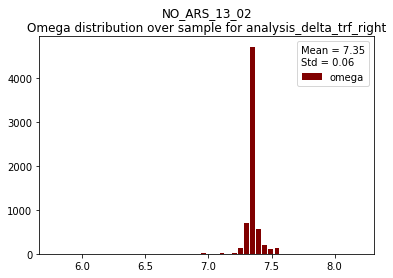

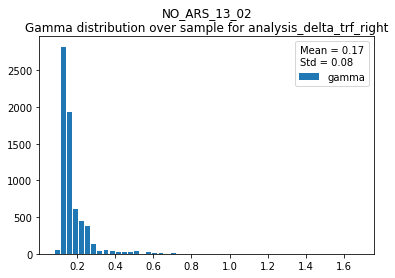

In [9]:
#HISTOGRAMs - MARKOV
markov_Omegas = np.array([matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] for (ii,jj) in boni])
markov_Gammas =  np.array([matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] for (ii,jj) in boni])


plt.figure()
plt.title('{}\nOmega distribution over sample for {}'.format(spectra_filename, analysis_dir), pad = 5.)
_ = plt.hist(markov_Omegas, bins = 50, label = 'omega',histtype = 'bar', stacked = True, rwidth= 0.8,  color = 'maroon')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(markov_Omegas), np.std(markov_Omegas)))
plt.savefig(now_path+'Omega_markov_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('{}\nGamma distribution over sample for {}'.format(spectra_filename, analysis_dir), pad = 5.)
_ = plt.hist(markov_Gammas, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8)
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(markov_Gammas), np.std(markov_Gammas)))
plt.savefig(now_path+'Gamma_markov_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()


In [10]:
#Parametri di Interesse per analisi
markov_too_bad = ()
markov_too_good  = ()
markov_omega_too_high =  ()
markov_gamma_too_bad = ()

markov_omega_max = np.mean(markov_Omegas)+3*np.std(markov_Omegas)
markov_gamma_max = np.mean(markov_Gammas)+3*np.std(markov_Gammas)
cost_max = 1000
cost_min = 50


markov_too_bad = Get_Bad_Elements(matrix, boni, cost_max, fit = 'markov')
markov_too_good = Get_Good_Elements(matrix, boni, cost_min, fit = 'markov')
markov_omega_too_high = Whose_Param_Too_High('Omega', markov_omega_max, 'markov', matrix, boni)
markov_gamma_too_high = Whose_Param_Too_High('Gamma', markov_gamma_max, 'markov', matrix, boni)


#aggiunte 
markov_too_offset = ()
percentage_gamma = 15
max_offset = 30
markov_almost_height = ()

for (ii,jj) in boni:
    if matrix[ii][jj].Markov_Fit_Params.T.StdErrs['Gamma'] > (matrix[ii][jj].Markov_Fit_Params.T.Values['Gamma']*(percentage_gamma/100)):
        markov_gamma_too_bad += ((ii,jj),)
    if matrix[ii][jj].Markov_Fit_Params['offset'].values[0] > max_offset:
        markov_too_offset += ((ii,jj),)
    if matrix[ii][jj].y.max() > 15000:
        markov_almost_height += ((ii,jj),)


print('\n\n\n\nHo trovato per i dati fit markov in {} :\n'.format(now_path))

print('{} elementi con chi quadro > {} '.format(len(markov_too_bad), cost_max))
print('{} elementi con chi quadro < {} \n'.format(len(markov_too_good), cost_min))


print('{} elementi con Omega > Omega max {:3.2f}'.format(len(markov_omega_too_high), markov_omega_max))
print('{} elementi con Gamma > Gamma max {:3.2f}\n'.format(len(markov_gamma_too_high), markov_gamma_max))

print('{} elementi con Gamma con errore percentuale > {} \n'.format(len(markov_gamma_too_bad), percentage_gamma))
print('{} elementi con offset > {} \n'.format(len(markov_too_offset), max_offset))





I found 0 bad elements out of 6650

I found 3171 good elements out of 6650





Ho trovato per i dati fit markov in ../BRILLOUIN/TDP43/NO_ARS_13_02/analysis_delta_trf_right/ :

0 elementi con chi quadro > 1000 
3171 elementi con chi quadro < 50 

136 elementi con Omega > Omega max 7.53
152 elementi con Gamma > Gamma max 0.41

56 elementi con Gamma con errore percentuale > 15 

0 elementi con offset > 30 



(1, 10)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.027790  7.383531  0.258980            1.98  1.883605e+06   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.022909  7.383547  0.258811            1.98  1.883605e+06   

          delta_amplitude            A         mu      sigma     shift  \
Values         357.241078  1594.082873  12.896150  16.914217  0.167533   
StdErrs               NaN          NaN        NaN        NaN       NaN   
Initials       357.241078  1594.082873  12.896149  16.914217  0.167574   

            offset  
Values    1.998677  
StdErrs        NaN  
Initials  1.998677  


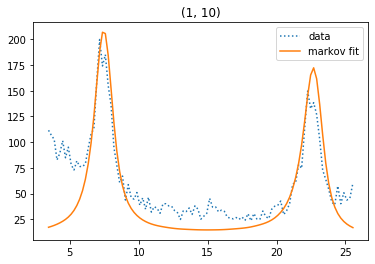

(1, 16)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.022760  7.346455  0.274101         1.30171  1.885161e+06   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.025031  7.346888  0.268480         1.30171  1.885161e+06   

          delta_amplitude            A         mu      sigma     shift  offset  
Values         999.413515  1912.889883  13.025145  16.931124  0.071843     2.0  
StdErrs               NaN          NaN        NaN        NaN       NaN     NaN  
Initials       999.413515  1912.889883  13.025136  16.931125  0.072827     2.0  


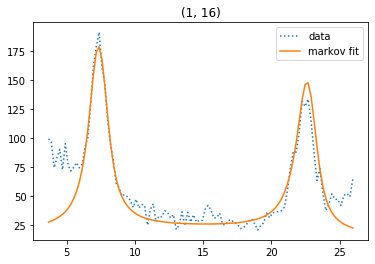

(2, 5)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.021499  7.335217  0.284239         -1.9957  1.885161e+06   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.019457  7.335217  0.284242         -1.9957  1.885161e+06   

          delta_amplitude            A        mu      sigma     shift  \
Values        1174.202379  1530.637033  13.05375  16.934295  0.031167   
StdErrs               NaN          NaN       NaN        NaN       NaN   
Initials      1174.202379  1530.637033  13.05375  16.934295  0.031163   

            offset  
Values    1.999767  
StdErrs        NaN  
Initials  1.999767  


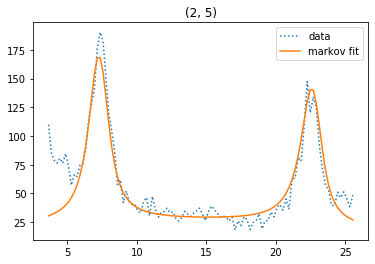

In [11]:
Plot_Elements_Spectrum(matrix, [(1,10), (1, 16), (2, 5)], fit = 'markov')

In [12]:
for ii,jj in boni: 
    if matrix[ii][jj].y.max() > 15000:
        markov_almost_height.append((ii,jj))
almost_height

NameError: name 'almost_height' is not defined

In [13]:
for ii,jj in boni[:5]:
    print(matrix[ii][jj].Markov_Fit_Params.values[0])

[1.40274688e-02 7.30959068e+00 1.43673529e-01 2.00000000e+00
 1.38600418e+01 2.77668820e-03 2.91742798e+03 1.19610760e+01
 1.67907848e+01 5.95443618e-02 1.42533544e+00]
[ 1.35286224e-02  7.32205727e+00  1.46387359e-01 -1.99997775e+00
  4.40836016e+01  1.23665037e-02  2.94479685e+03  1.20806868e+01
  1.68075756e+01  3.30131152e-02 -2.00000000e+00]
[ 1.31947740e-02  7.32938008e+00  1.21784321e-01  2.00000000e+00
  3.06636530e+04  5.89241037e+00  2.35583797e+03  1.22014936e+01
  1.68243832e+01  6.83553764e-02 -1.38952758e+00]
[ 1.36235619e-02  7.33569794e+00  1.29505836e-01 -1.58948026e+00
  2.81086976e+04  6.15046065e+00  2.82700557e+03  1.23235086e+01
  1.68412076e+01  3.35087281e-02 -2.00000000e+00]
[ 1.33367546e-02  7.31985918e+00  1.26460734e-01  9.45081813e-01
  2.87711636e+04  6.14410112e+00  3.39175464e+03  1.24467436e+01
  1.68243663e+01  5.39390995e-02 -2.00000000e+00]


In [14]:
################ TOTALE

with open(now_path+'y_tot_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_tot.txt', 'r') as fin:
    costi = fin.readlines()
with open(now_path+'tot_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,  boni) :
    matrix[ii][jj].Recover_Tot_Fit_Params(line)
    matrix[ii][jj].Recover_y_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_tot(float(cost))

print('Ok ho recuperato le informazioni del Fit Totale')

Ok ho recuperato le informazioni del Fit Totale


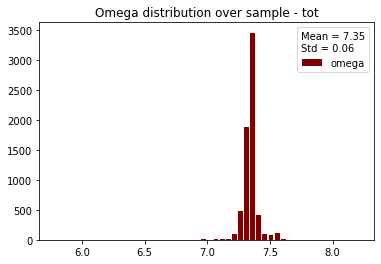

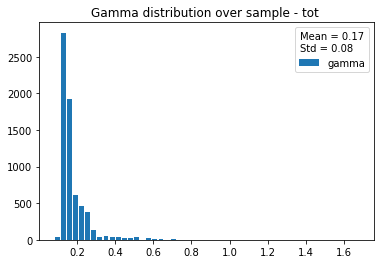

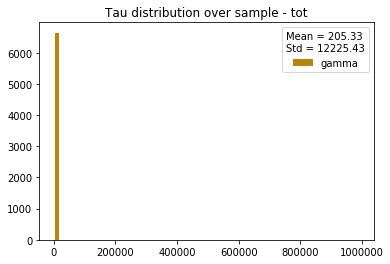

In [15]:
#HISTOGRAMs
tot_Omegas = np.array([matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] for (ii,jj) in boni])
tot_Gammas =  np.array([matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] for (ii,jj) in boni])
taus       = np.array([matrix[ii][jj].Tot_Fit_Params['tau'].values[0] for (ii,jj) in boni])

plt.figure()
plt.title('Omega distribution over sample - tot')
_ = plt.hist(tot_Omegas, bins = 50, label = 'omega',histtype = 'bar', stacked = True, rwidth= 0.8,  color = 'maroon')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(tot_Omegas), np.std(tot_Omegas)))
plt.savefig(now_path+'Omega_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('Gamma distribution over sample - tot ')
_ = plt.hist(tot_Gammas, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8)
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(tot_Gammas), np.std(tot_Gammas)))
plt.savefig(now_path+'Gamma_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('Tau distribution over sample - tot')
_ = plt.hist(taus, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8, color = 'darkgoldenrod')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(taus), np.std(taus)))
plt.savefig(now_path+'tau_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()


In [16]:
#Parametri di Interesse per analisi
tot_too_bad = ()
tot_too_good  = ()
tot_omega_too_high =  ()
tot_gamma_too_bad = ()
tau_not_bad = []

tot_omega_max = np.mean(tot_Omegas)+3*np.std(tot_Omegas)
tot_omega_min = np.mean(tot_Omegas)-3*np.std(tot_Omegas)

tot_gamma_max = np.mean(tot_Gammas)+5*np.std(tot_Gammas)
cost_max = 1000
cost_min = 50


tot_too_bad = Get_Bad_Elements(matrix, boni, cost_max, fit = 'tot')
tot_too_good = Get_Good_Elements(matrix, boni, cost_min, fit = 'tot')
tot_omega_too_high = Whose_Param_Too_High('Omega', tot_omega_max, 'tot', matrix, boni)
tot_gamma_too_high = Whose_Param_Too_High('Gamma', tot_gamma_max, 'tot', matrix, boni)
tot_omega_too_low =  Whose_Param_Too_Low('Omega', tot_omega_min,'tot', matrix, boni)

#aggiunte 
omega_different_from_mark = []
gamma_different_from_mark = []

percentage_diff = 0.8
tot_too_offset = ()
percentage_gamma = 100
max_offset = 30
almost_height = ()

for (ii,jj) in boni:
    
    perc_omega = matrix[ii][jj].Tot_Fit_Params['Omega'].values[0]*percentage_diff/100
    perc_gamma = matrix[ii][jj].Tot_Fit_Params['Omega'].values[0]*percentage_diff/100

    if (matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] > matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] + perc_gamma) | (matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] < matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] - perc_gamma):
        omega_different_from_mark.append((ii,jj))
    if (matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] > matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] + perc_gamma) | (matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] < matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] - perc_omega):
        gamma_different_from_mark.append((ii,jj))
    if matrix[ii][jj].Tot_Fit_Params.T.StdErrs['Gamma'] > (matrix[ii][jj].Tot_Fit_Params.T.Values['Gamma']*(percentage_gamma/100)):
        tot_gamma_too_bad += ((ii,jj),)
    if matrix[ii][jj].Tot_Fit_Params['offset'].values[0] > max_offset:
        tot_too_offset += ((ii,jj),)
    if matrix[ii][jj].y.max() > 15000:
        tot_almost_height += ((ii,jj),)
    if matrix[ii][jj].Tot_Fit_Params['tau']['StdErrs'] < matrix[ii][jj].Tot_Fit_Params['tau']['Values']:
        tau_not_bad.append((ii,jj))


print('\n\n\n\nHo trovato per i dati fit markov in {} :\n'.format(now_path))

print('{} elementi con chi quadro > {} '.format(len(tot_too_bad), cost_max))
print('{} elementi con chi quadro < {} \n'.format(len(tot_too_good), cost_min))


print('{} elementi con Omega > Omega max {:3.2f}'.format(len(tot_omega_too_high), tot_omega_max))
print('{} elementi con Omega < Omega min {:3.2f}'.format(len(tot_omega_too_low), tot_omega_min))

print('{} elementi con Gamma > Gamma max {:3.2f}\n'.format(len(tot_gamma_too_high), tot_gamma_max))


print('{} elementi con Gamma con errore percentuale > {} \n'.format(len(tot_gamma_too_bad), percentage_gamma))
print('{} elementi con offset > {} \n'.format(len(tot_too_offset), max_offset))

print('{} elementi il cui fit tot di Omega è diverso del {} percento da markoviano'.format(len(omega_different_from_mark), percentage_diff))
print('{} elementi il cui fit tot di Gamma è diverso del {} percento da markoviano'.format(len(gamma_different_from_mark), percentage_diff))
print('{} elementi il cui fit di tau non è cosi male..'.format(len(tau_not_bad)), tau_not_bad)


I found 0 bad elements out of 6650

I found 3369 good elements out of 6650





Ho trovato per i dati fit markov in ../BRILLOUIN/TDP43/NO_ARS_13_02/analysis_delta_trf_right/ :

0 elementi con chi quadro > 1000 
3369 elementi con chi quadro < 50 

122 elementi con Omega > Omega max 7.53
32 elementi con Omega < Omega min 7.16
41 elementi con Gamma > Gamma max 0.57

60 elementi con Gamma con errore percentuale > 100 

0 elementi con offset > 30 

461 elementi il cui fit tot di Omega è diverso del 0.8 percento da markoviano
0 elementi il cui fit tot di Gamma è diverso del 0.8 percento da markoviano
0 elementi il cui fit di tau non è cosi male.. []


In [17]:
Plot_Elements_Spectrum(matrix, tau_not_bad[:10], fit = 'tot')

Completata Parameter_Map per Omega
Ho trovato 38 elementi saturati


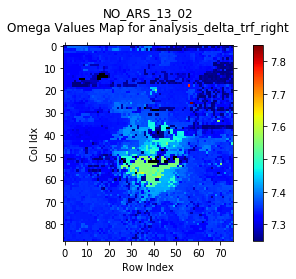

Completata Parameter_Map per Omega
Ho trovato 38 elementi saturati


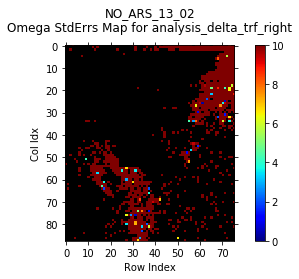

Completata Parameter_Map per Gamma
Ho trovato 38 elementi saturati


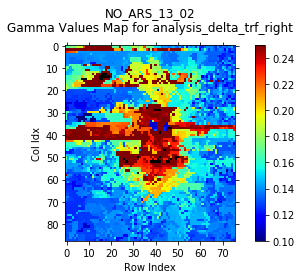

Completata Parameter_Map per Gamma
Ho trovato 38 elementi saturati


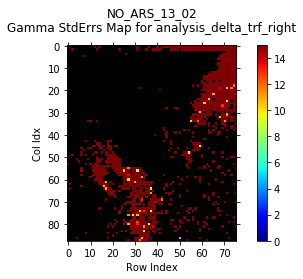

Completata Parameter_Map per tau
Ho trovato 38 elementi saturati


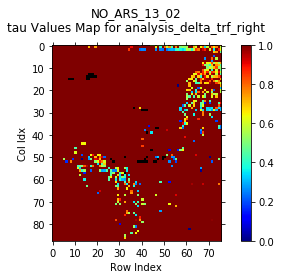

Completata Parameter_Map per tau
Ho trovato 38 elementi saturati


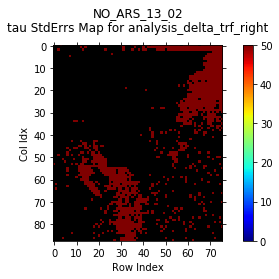

In [18]:
omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.25, 7.85, analysis_dir, spectra_filename,fig = 'omega_tot_map', path=now_path)
Delta_omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,10,analysis_dir, spectra_filename, fig = 'Delta_omega_tot_map', path=now_path, Deltas = True)
gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.1,0.25, analysis_dir, spectra_filename,fig = 'Gamma_tot_map', path=now_path)
Delta_gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0,15,analysis_dir, spectra_filename, fig = 'Delta_gamma_tot_map', path=now_path, Deltas = True)
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0., 1,analysis_dir, spectra_filename, fig = 'tau_map', path=now_path)
Delta_tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0,50,analysis_dir, spectra_filename, fig = 'Delta_tau_map', path=now_path, Deltas = True)

Completata Parameter_Map per tau
Ho trovato 38 elementi saturati


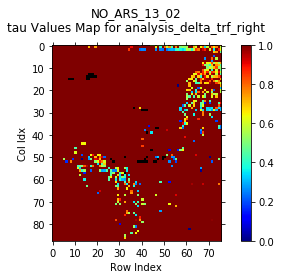

In [19]:
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0., 1,analysis_dir, spectra_filename, fig = 'tau_map', path=now_path)


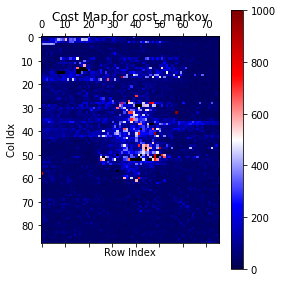

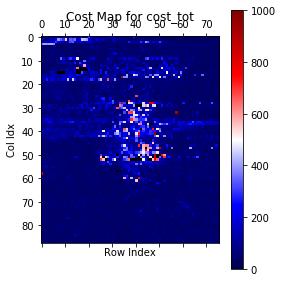

In [20]:
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)
tot_cost_map = Get_cost_map(matrix, 'tot', len(rows), len(cols), 'tot_cost_map', path = now_path)


In [21]:
for ii,jj in boni[:2]:
    matrix[ii][jj].Markov_Fit_Params.to_hdf('markov_prova.df', key = str((ii,jj)))

In [22]:
prova = []
for ii,jj in boni[:2]:
    prova.append(pd.read_hdf('markov_prova.df', str((ii,jj))))

In [23]:
prova

[                Co     Omega     Gamma  delta_position  delta_width  \
 Values    0.014027  7.309591  0.143674        2.000000    13.860042   
 StdErrs   0.049703  0.019745  0.013825       33.683422    64.385230   
 Initials  0.011746  7.384492  0.121012       -1.255475     9.153369   
 
           delta_amplitude             A         mu       sigma     shift  \
 Values           0.002777  2.917428e+03  11.961076   16.790785  0.059544   
 StdErrs          0.052409  5.382718e+09  34.537195  100.937285  0.019969   
 Initials         0.009168  3.637026e+03  11.842650   16.774011  0.206052   
 
              offset  
 Values     1.425335  
 StdErrs   29.466100  
 Initials   2.000000  ,
                 Co     Omega     Gamma  delta_position  delta_width  \
 Values    0.013529  7.322057  0.146387       -1.999978    44.083602   
 StdErrs   0.045194  0.020639  0.014216      520.988786  5661.570599   
 Initials  0.014027  7.309591  0.143674        2.000000    13.860042   
 
           delta_

In [24]:
p0s = {}
for ii,jj in boni[:5]:
    p0s[str((ii,jj))] = matrix[ii][jj].Markov_Fit_Params.T['Values'][list(cols_mark)]

In [25]:
neighs = [(0,32), (0,30)]
np.min([matrix[ii][jj].Get_cost_markov(p0s[str((ii,jj))].values, cols_mark) for ii,jj in neighs])

KeyError: '(0, 32)'

In [26]:
costs = []
for p in p0s.items():
    print(p[1])

Co                    0.014027
Omega                 7.309591
Gamma                 0.143674
delta_position        2.000000
delta_width          13.860042
delta_amplitude       0.002777
A                  2917.427975
mu                   11.961076
sigma                16.790785
shift                 0.059544
offset                1.425335
Name: Values, dtype: float64
Co                    0.013529
Omega                 7.322057
Gamma                 0.146387
delta_position       -1.999978
delta_width          44.083602
delta_amplitude       0.012367
A                  2944.796847
mu                   12.080687
sigma                16.807576
shift                 0.033013
offset               -2.000000
Name: Values, dtype: float64
Co                     0.013195
Omega                  7.329380
Gamma                  0.121784
delta_position         2.000000
delta_width        30663.652974
delta_amplitude        5.892410
A                   2355.837973
mu                    12.201494
sigm

In [27]:
for p in p0s.items():
    p[1][['mu', 'sigma']]  = np.array([123. , 123])
    print(p[1])

Co                    0.014027
Omega                 7.309591
Gamma                 0.143674
delta_position        2.000000
delta_width          13.860042
delta_amplitude       0.002777
A                  2917.427975
mu                  123.000000
sigma               123.000000
shift                 0.059544
offset                1.425335
Name: Values, dtype: float64
Co                    0.013529
Omega                 7.322057
Gamma                 0.146387
delta_position       -1.999978
delta_width          44.083602
delta_amplitude       0.012367
A                  2944.796847
mu                  123.000000
sigma               123.000000
shift                 0.033013
offset               -2.000000
Name: Values, dtype: float64
Co                     0.013195
Omega                  7.329380
Gamma                  0.121784
delta_position         2.000000
delta_width        30663.652974
delta_amplitude        5.892410
A                   2355.837973
mu                   123.000000
sigm

In [28]:
p[1]['Co']

0.013336754635287985